In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df=pd.read_csv('ITS_Cleaned & Transformed student data.csv')

In [3]:
df.head()

,Full Name,Enrollment ID,Age Group,Gender,State,Department,Program,Year of Study,Regular transportation mode,Source of Admission Information,Primary Reason for Choosing the College,Preferred Time for Studying,Preferred Device for Study,Use of Library,Participation in Extracurricular Activities,Gym Membership,Monthly spending on essentials,Post-Graduation Plans
0,Mohd Atif,22stucddd04008,19-22,Male,Uttarakhand,ICFAI Tech School,B.sc(Data science),Third Year,Walking,College website,Specific programs or majors offered,Late Night,Laptop,Weekly,"Sports & games (cricket, badminton, chess, etc.)","Yes, on-campus gym","Less than ₹10,000",Further Studies
1,Nishant Mathur testing file,636373,27-30,Male,Uttarakhand,ICFAI Tech School,Ph.D,Fifth Year,Public transport,School counselor,Campus facilities,Night,Laptop,Monthly,"Academic clubs (debate, quiz, etc.)",No,"₹10,000 - ₹19,999",Start a Business
2,Akshat Gupta,23STUCDDD01016,15-18,Male,Uttarakhand,ICFAI Tech School,B. Tech,First Year,Personal vehicle,Friends or family,Family or friends' recommendations,Early Morning,Laptop,Weekly,"Sports & games (cricket, badminton, chess, etc.)","Yes, off-campus gym","Less than ₹10,000",Job in other Domain
3,Rishi Gupta,23STUCDDN04002,19-22,Male,Delhi,ICFAI Tech School,B.sc(Data science),Second Year,Walking,Social media,Specific programs or majors offered,Early Morning,Laptop,Daily,"Sports & games (cricket, badminton, chess, etc.)","Yes, on-campus gym","Less than ₹10,000",Start a Business
4,Lovely Chauhan,lovelychauhan071@gmail.com,19-22,Female,Uttar pradesh,ICFAI Tech School,B. Tech,First Year,Walking,Social media,Specific programs or majors offered,Evening,Laptop,Daily,"Arts (singing, dancing, painting, etc.)","Yes, off-campus gym","Less than ₹10,000",Further Studies


In [4]:
df.shape

(87, 18)

In [5]:
df.isna().sum()

Full Name                                      0
Enrollment ID                                  0
Age Group                                      0
Gender                                         0
State                                          0
Department                                     0
Program                                        0
Year of Study                                  0
Regular transportation mode                    0
Source of Admission Information                0
Primary Reason for Choosing the College        0
Preferred Time for Studying                    0
Preferred Device for Study                     0
Use of Library                                 0
Participation in Extracurricular Activities    0
Gym Membership                                 0
Monthly spending on essentials                 0
Post-Graduation Plans                          0
dtype: int64

# Descriptive Statistics:

In [6]:
df.describe()

,Full Name,Enrollment ID,Age Group,Gender,State,Department,Program,Year of Study,Regular transportation mode,Source of Admission Information,Primary Reason for Choosing the College,Preferred Time for Studying,Preferred Device for Study,Use of Library,Participation in Extracurricular Activities,Gym Membership,Monthly spending on essentials,Post-Graduation Plans
count,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
unique,87,87,5,2,9,1,5,5,4,4,6,5,3,5,6,3,4,4
top,Mohd Atif,22stucddd04008,19-22,Male,Uttarakhand,ICFAI Tech School,BCA,Second Year,Walking,Friends or family,Financial aid/scholarships,Early Morning,Laptop,Weekly,"Sports & games (cricket, badminton, chess, etc.)",No,"Less than ₹10,000",Job in Field of Study
freq,1,1,63,65,45,87,46,38,53,40,29,28,61,30,53,59,67,47


### Distribution of Age Group in the University

In [7]:
age_distribution=df.groupby('Age Group')['Enrollment ID'].count().reset_index()
age_distribution.columns=['Age Group','Number of students']

In [8]:
age_distribution

,Age Group,Number of students
0,15-18,18
1,19-22,63
2,23-26,3
3,27-30,2
4,30 and above,1


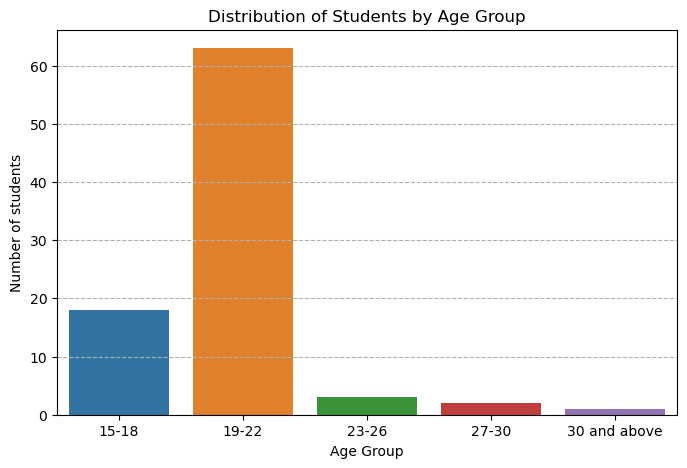

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group',y='Number of students',data=age_distribution)
plt.title('Distribution of Students by Age Group')
plt.grid(axis='y', linestyle='--')
plt.show()

### Distribution of Gender in the University

In [10]:
gender_distribution=df['Gender'].value_counts()
gender_distribution

Male      65
Female    22
Name: Gender, dtype: int64

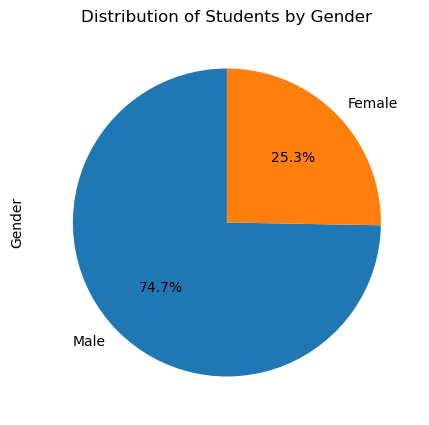

In [11]:
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students by Gender')
plt.show()

### Distribution of students vary by state

In [12]:
state_distribution=df.groupby('State')['Enrollment ID'].count().reset_index()
state_distribution.columns=['State','Number of students']
state_distribution

,State,Number of students
0,Assam,1
1,Bihar,9
2,Delhi,2
3,Haryana,2
4,Himachal pradesh,2
5,Jharkhand,2
6,Uttar pradesh,22
7,Uttarakhand,45
8,West bengal,2


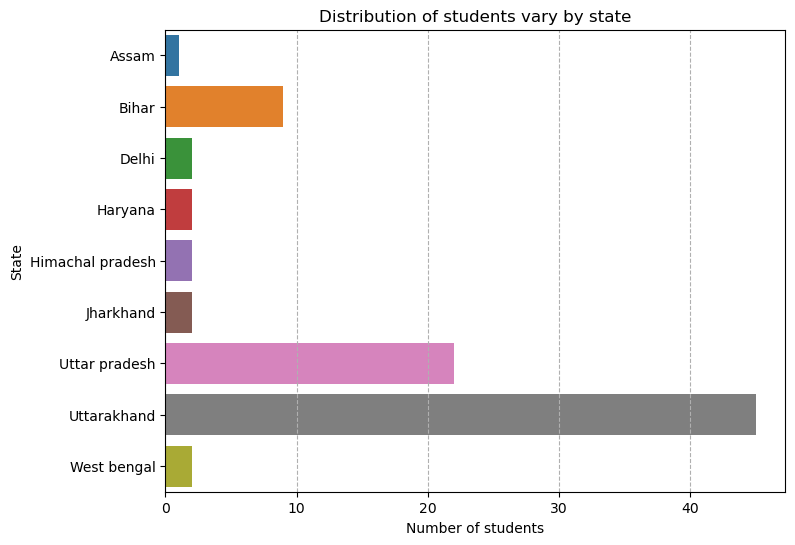

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x='Number of students',y='State',data=state_distribution)
plt.title('Distribution of students vary by state')
plt.grid(axis='x', linestyle='--')
plt.show()

### Distribution of Regular transportation modes

In [14]:
transportation_distribution=df['Regular transportation mode'].value_counts()
transportation_distribution

Walking             53
Public transport    16
Personal vehicle    14
College bus          4
Name: Regular transportation mode, dtype: int64

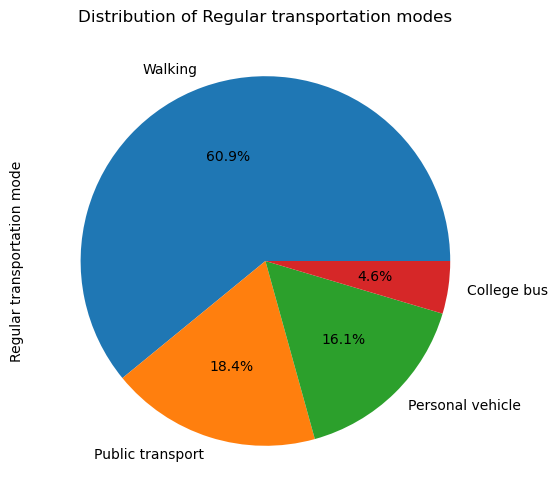

In [15]:
plt.figure(figsize=(6,6))
transportation_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Regular transportation modes')
plt.show()

# Trend Analysis:

### The most common reasons for choosing the college

In [16]:
source_distribution=df['Source of Admission Information'].value_counts()
source_distribution

Friends or family    40
College website      20
School counselor     14
Social media         13
Name: Source of Admission Information, dtype: int64

In [17]:
reason_distribution=df['Primary Reason for Choosing the College'].value_counts()
reason_distribution

Financial aid/scholarships             29
Location                               21
Family or friends' recommendations     19
Specific programs or majors offered    10
Academic reputation                     7
Campus facilities                       1
Name: Primary Reason for Choosing the College, dtype: int64

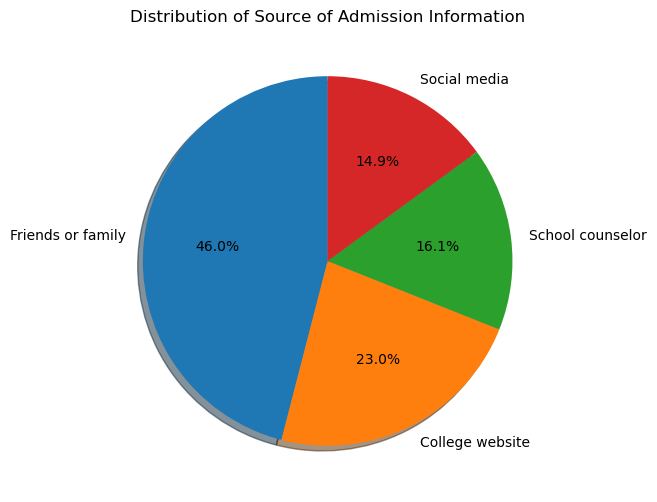

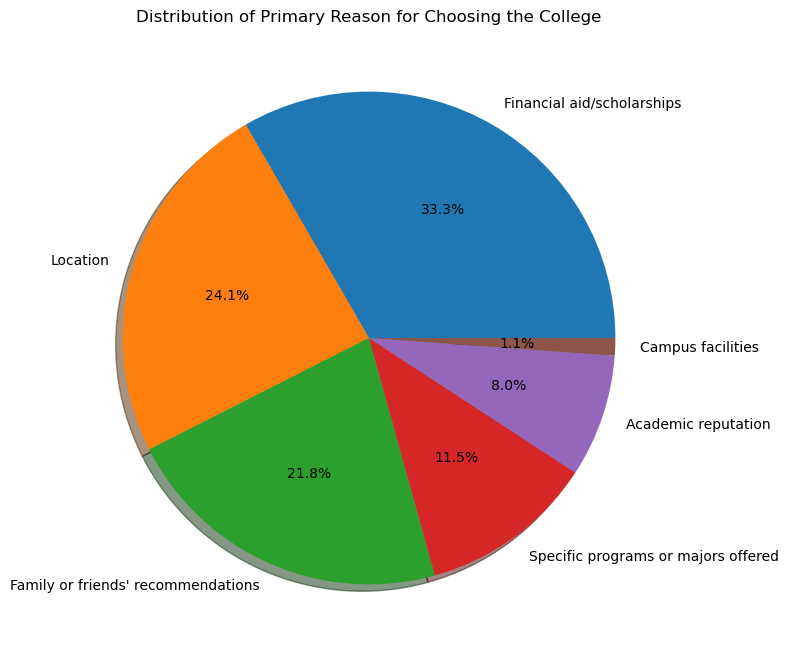

In [18]:
plt.figure(figsize=(6,6))
source_distribution.plot.pie(autopct='%1.1f%%', startangle=90,shadow=True,label='')
plt.title('Distribution of Source of Admission Information')
plt.show()
plt.figure(figsize=(8,8))
reason_distribution.plot.pie(autopct='%1.1f%%',shadow=True,label='')
plt.title('Distribution of Primary Reason for Choosing the College')
plt.show()

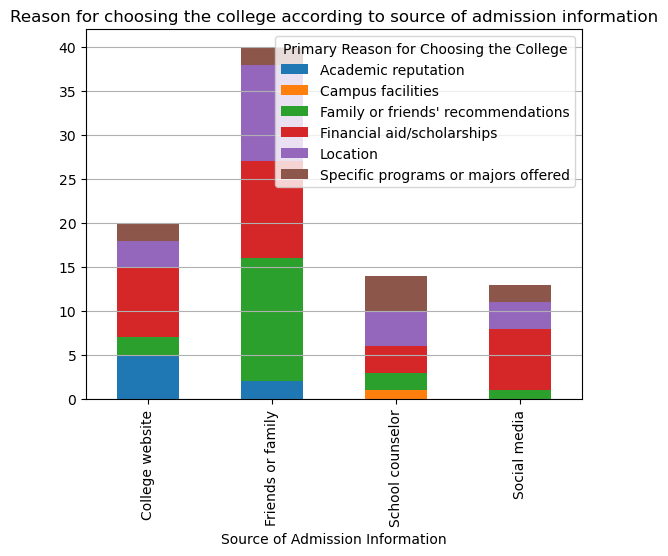

In [47]:
ct=pd.crosstab(df['Source of Admission Information'],df['Primary Reason for Choosing the College'])
ct.plot(kind='bar',stacked=True)
plt.title('Reason for choosing the college according to source of admission information')
plt.grid(axis='y')
plt.show()

### Commonly used device for studying

In [20]:
preferred_devices_distribution=df['Preferred Device for Study'].value_counts()
preferred_devices_distribution

Laptop        61
Smartphone    24
Desktop        2
Name: Preferred Device for Study, dtype: int64

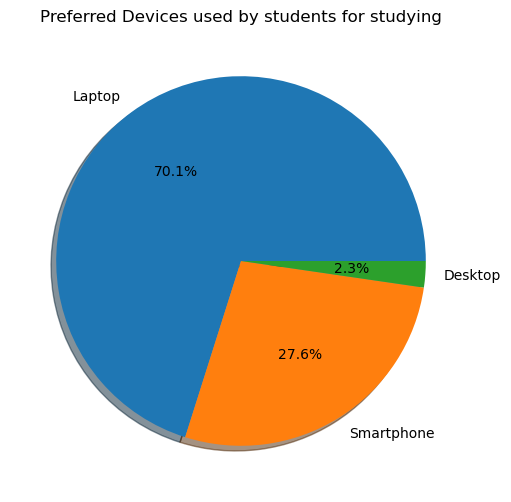

In [21]:
plt.figure(figsize=(6,6))
preferred_devices_distribution.plot.pie(autopct='%1.1f%%',shadow=True,label='')
plt.title('Preferred Devices used by students for studying')
plt.show()

In [22]:
library_used=df['Use of Library'].value_counts().reset_index()
library_used.columns=['Use of Library','Frequency']
library_used

,Use of Library,Frequency
0,Weekly,30
1,Rarely,23
2,Daily,17
3,Monthly,13
4,Never,4


### How often students used library

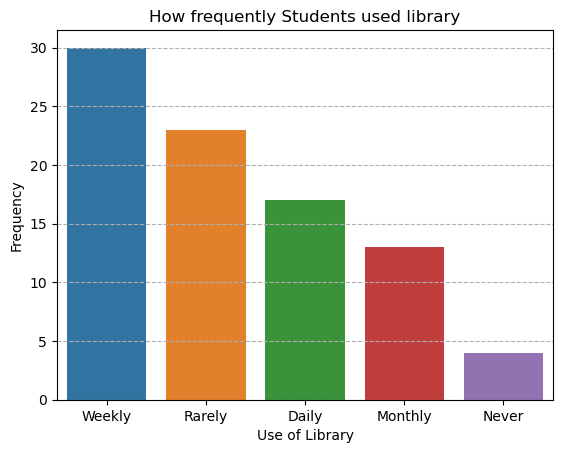

In [23]:
sns.barplot(x='Use of Library',y='Frequency',data=library_used)
plt.title('How frequently Students used library')
plt.grid(axis='y', linestyle='--')
plt.show()

### Distribution of student's participation in Extracurricular activities

In [24]:
extra_activity_distribution=df['Participation in Extracurricular Activities'].value_counts()
extra_activity_distribution

Sports & games (cricket, badminton, chess, etc.)    53
Arts (singing, dancing, painting, etc.)             11
Volunteer work/community service                     9
Academic clubs (debate, quiz, etc.)                  8
Others (Gaming, poetry, Research & More)             3
Nothing                                              3
Name: Participation in Extracurricular Activities, dtype: int64

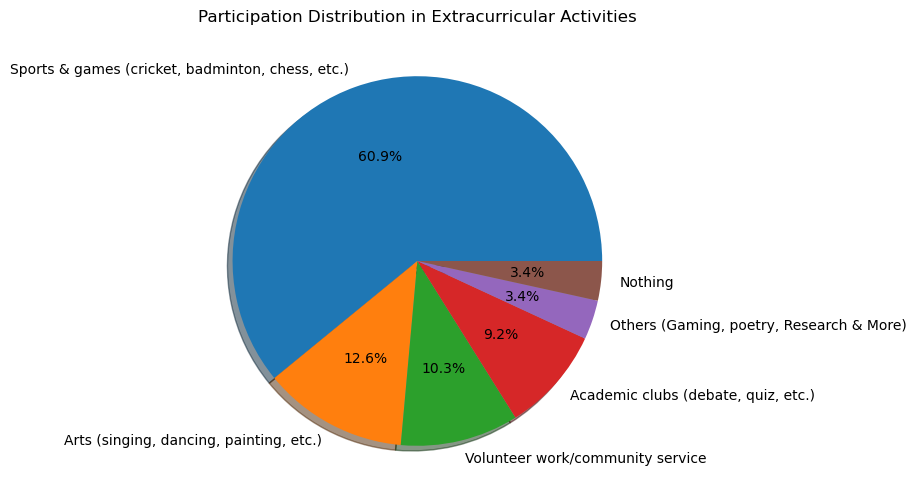

In [25]:
plt.figure(figsize=(6,6))
extra_activity_distribution.plot.pie(autopct='%1.1f%%',shadow=True,label='')
plt.title('Participation Distribution in Extracurricular Activities')
plt.show()

### Distribution of student's participation in Gym Membership

In [26]:
gym_membership_distribution=df['Gym Membership'].value_counts()
gym_membership_distribution

No                     59
Yes, off-campus gym    20
Yes, on-campus gym      8
Name: Gym Membership, dtype: int64

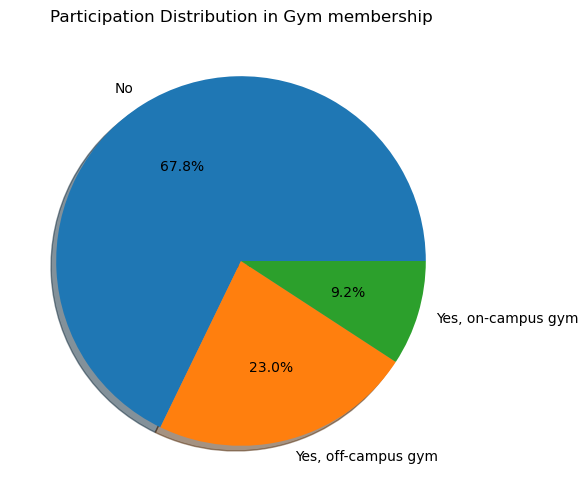

In [27]:
plt.figure(figsize=(6,6))
gym_membership_distribution.plot.pie(autopct='%1.1f%%',shadow=True,label='')
plt.title('Participation Distribution in Gym membership')
plt.show()

### Monthly spending behavior

In [28]:
spending_distribution=df.groupby('Monthly spending on essentials').size().reset_index()
spending_distribution.columns=['Monthly spending','Number of students']
spending_distribution

,Monthly spending,Number of students
0,"Less than ₹10,000",67
1,"₹10,000 - ₹19,999",16
2,"₹20,000 - ₹29,999",1
3,"₹30,000 or more",3


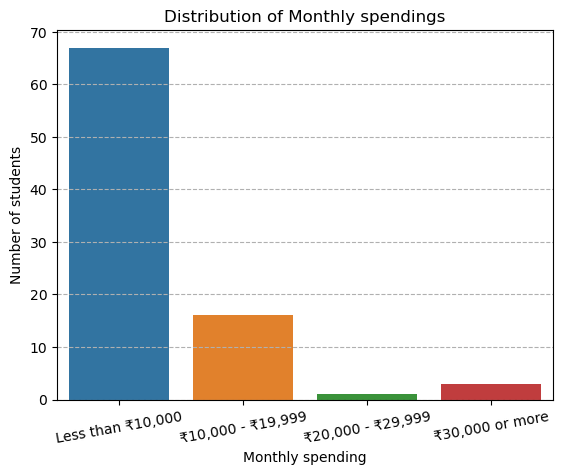

In [29]:
sns.barplot(x='Monthly spending',y='Number of students',data=spending_distribution)
plt.title('Distribution of Monthly spendings')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--')
plt.show()

### Post graduation plans Distribution

In [30]:
post_grad_plan=df['Post-Graduation Plans'].value_counts()
post_grad_plan

Job in Field of Study    47
Further Studies          29
Start a Business          8
Job in other Domain       3
Name: Post-Graduation Plans, dtype: int64

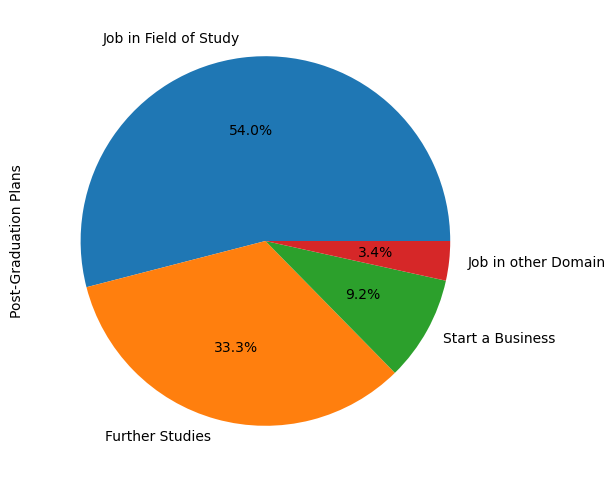

In [31]:
plt.figure(figsize=(6,6))
post_grad_plan.plot.pie(autopct='%1.1f%%')
plt.show()

# Correlation Analysis:

### Correlation between Age-group & Gender

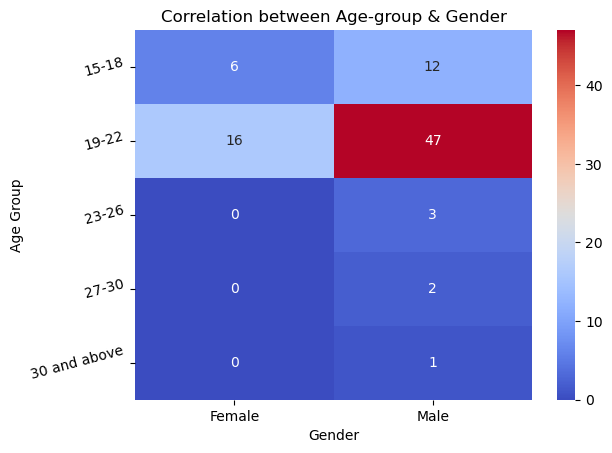

In [32]:
ct=pd.crosstab(df['Age Group'],df['Gender'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Correlation between Age-group & Gender')
plt.yticks(rotation=15)
plt.show()

### Preferred time for studying according to age groups

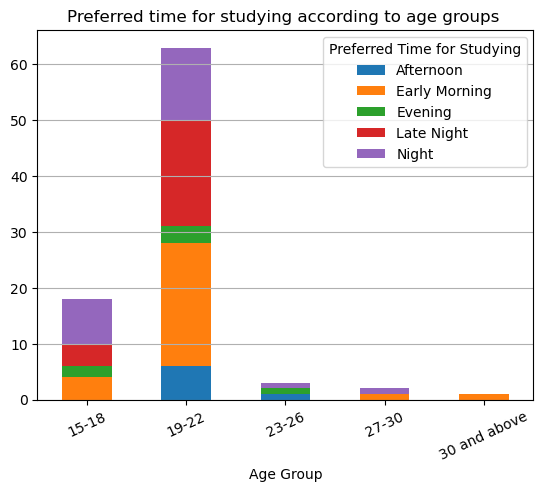

In [48]:
ct=pd.crosstab(df['Age Group'],df['Preferred Time for Studying'])
ct.plot(kind='bar',stacked= True)
plt.title('Preferred time for studying according to age groups ')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.show()

### Preferred Study Times Across Different Years of Study

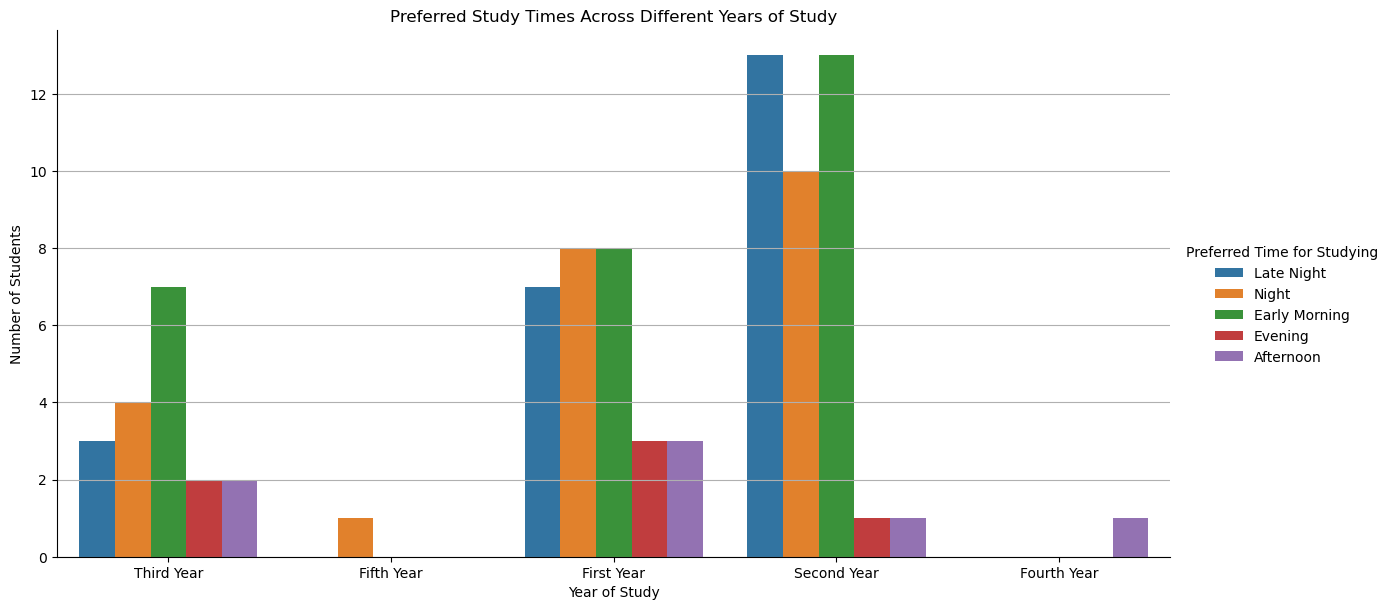

In [49]:
sns.catplot(data=df, x='Year of Study', hue='Preferred Time for Studying', kind='count', height=6, aspect=2)
plt.title('Preferred Study Times Across Different Years of Study')
plt.xlabel('Year of Study')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

### Correlation between the Preferred time for studying and Use of the library

In [35]:
ct=pd.crosstab(df['Preferred Time for Studying'],df['Use of Library'])
ct

Use of Library,Daily,Monthly,Never,Rarely,Weekly
Preferred Time for Studying,,,,,
Afternoon,3,0,1,2,1
Early Morning,6,4,1,3,14
Evening,2,1,0,3,0
Late Night,3,4,2,6,8
Night,3,4,0,9,7


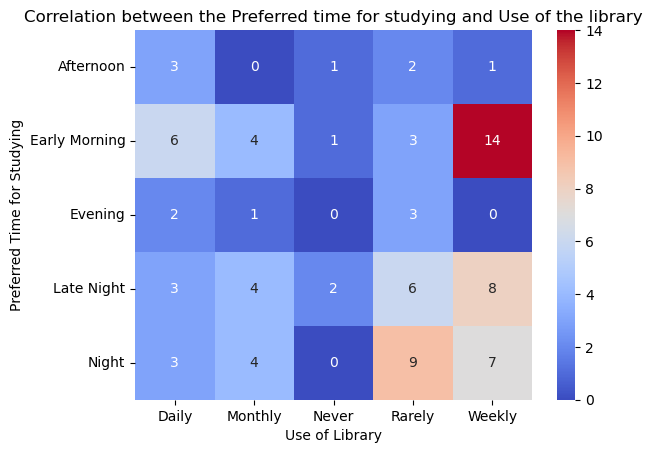

In [36]:
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Correlation between the Preferred time for studying and Use of the library')
plt.show()

### Correlation Age-group & Program

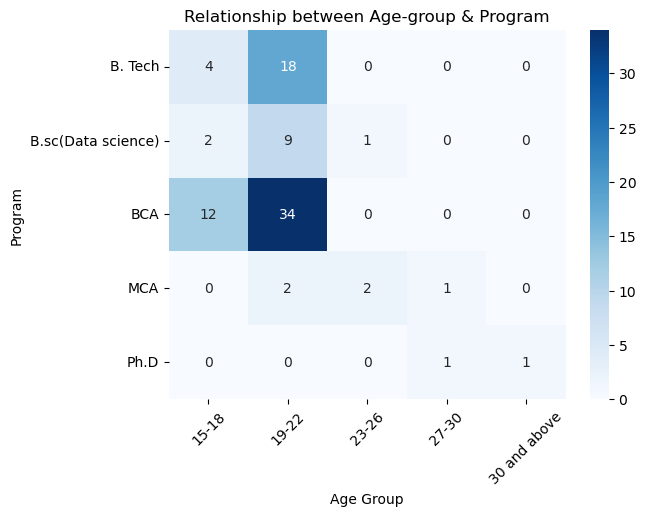

In [37]:
CT=pd.crosstab(df['Program'],df['Age Group'])
sns.heatmap(CT, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Age-group & Program')
plt.xticks(rotation=45)
plt.show()

### Relationship between Source of Admission Information & Primary Reason for Choosing the College

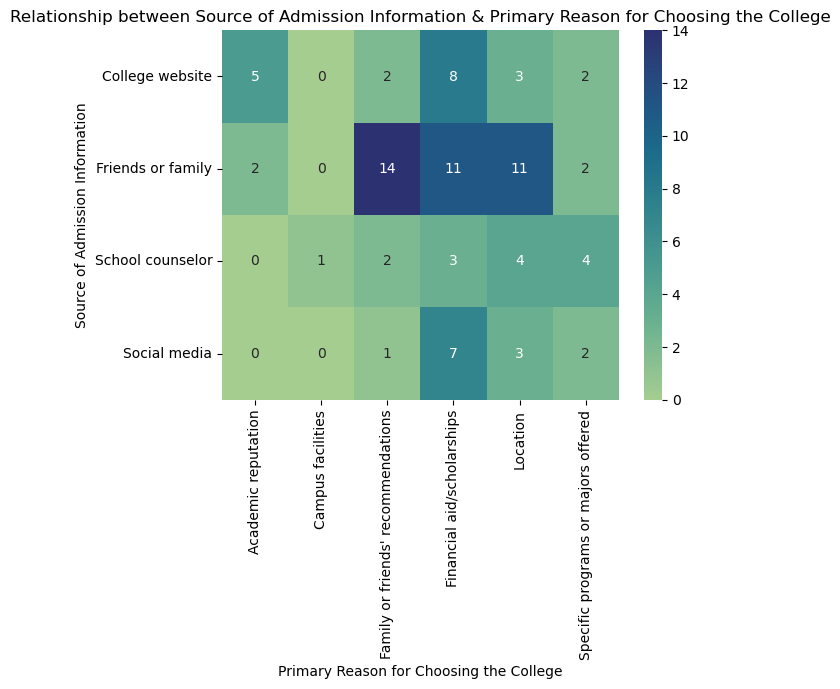

In [38]:
ct=pd.crosstab(df['Source of Admission Information'],df['Primary Reason for Choosing the College'])
sns.heatmap(ct, annot=True, fmt='d', cmap='crest')
plt.title('Relationship between Source of Admission Information & Primary Reason for Choosing the College')
plt.xticks(rotation=90)
plt.show()

### Relationship between Year of study & Preferred time for studying

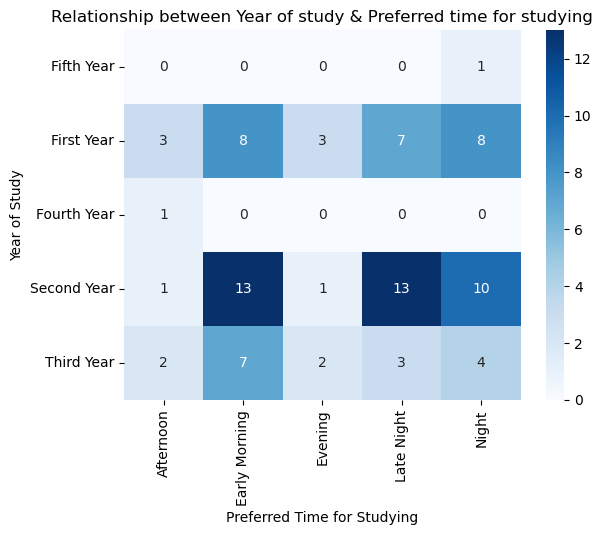

In [39]:
ct=pd.crosstab(df['Year of Study'],df['Preferred Time for Studying'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Year of study & Preferred time for studying')
plt.show()

### Post-Graduation plans according to different Programs

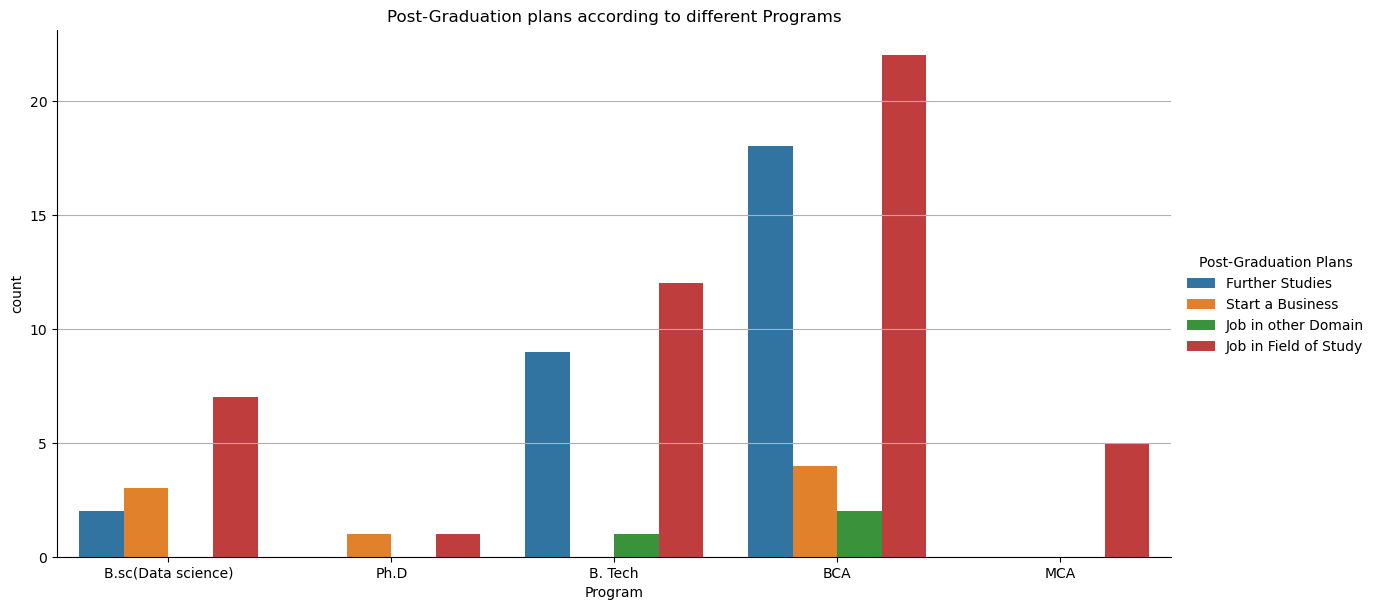

In [50]:
sns.catplot(data=df, x='Program', hue='Post-Graduation Plans', kind='count', height=6, aspect=2)
plt.title('Post-Graduation plans according to different Programs')
plt.grid(axis='y')
plt.show()

In [41]:
df['Primary Reason for Choosing the College'].value_counts()

Financial aid/scholarships             29
Location                               21
Family or friends' recommendations     19
Specific programs or majors offered    10
Academic reputation                     7
Campus facilities                       1
Name: Primary Reason for Choosing the College, dtype: int64

In [42]:
df[df['Primary Reason for Choosing the College']=='Specific programs or majors offered']['Program'].value_counts()

B.sc(Data science)    5
BCA                   4
B. Tech               1
Name: Program, dtype: int64

In [43]:
df[df['Post-Graduation Plans']=='Job in other Domain']['Program'].value_counts()

BCA        2
B. Tech    1
Name: Program, dtype: int64

In [44]:
its=pd.read_csv('BI_ITS_Cleaned & Transformed student data.csv')

In [45]:
its.columns

Index(['Full_Name', 'Enrollment_ID', 'Age_Group', 'Gender', 'State',
       'Department', 'Program', 'Year_of_Study', 'Regular_transportation_mode',
       'Source_of_Admission_Information',
       'Primary_Reason_for_Choosing_the_College',
       'Preferred_Time_for_Studying', 'Preferred_Device_for_Study',
       'Use_of_Library', 'Participation_in_Extracurricular_Activities',
       'Gym_Membership', 'Monthly_spending_on_essentials',
       'Post-Graduation_Plans'],
      dtype='object')